In [2]:
from lib import read_file

import numpy as np
from skimage.segmentation import flood_fill
import matplotlib.pyplot as plt

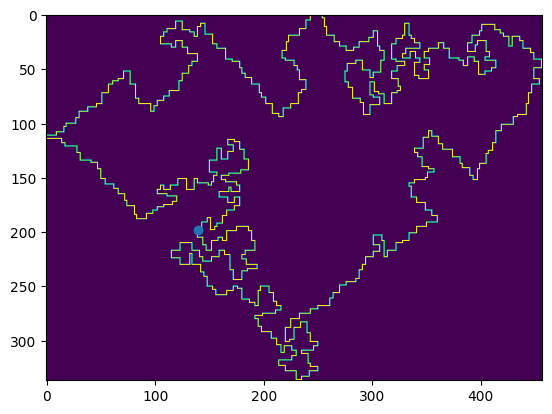

In [57]:
lines = read_file("18_input.txt")

idxs = []
idx = [0, 0]
for l in lines:
    dir, steps, _ = l.split()
    steps = int(steps)
    for _ in range(steps):
        if dir == "R":
            idx[1] += 1
        elif dir == "L":
            idx[1] -= 1
        elif dir == "D":
            idx[0] += 1
        elif dir == "U":
            idx[0] -= 1

        idxs.append(idx.copy())

idxs = np.array(idxs)
start = np.min(idxs, axis=0)
idxs = idxs - np.min(idxs, axis=0)
arr = np.zeros(np.max(idxs, axis=0) + 1)

for idx in idxs:
    arr[tuple(idx)] = 1

plt.imshow(arr)
plt.scatter(-start[1], -start[0])


62365.0

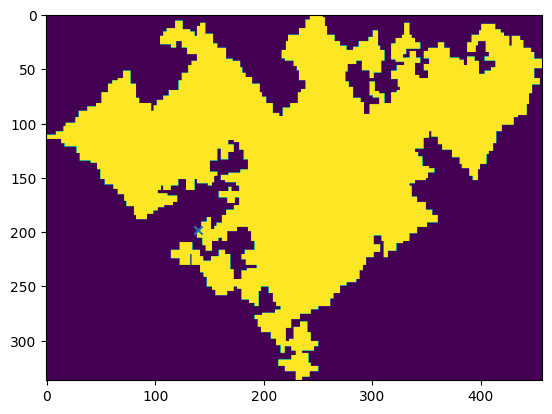

In [64]:
arr = flood_fill(arr, (100, 100), 1)
plt.imshow(arr)
plt.scatter(-start[1], -start[0], marker='x')
np.sum(arr)

In [73]:
lines = read_file("18_input.txt")

dirs = []
steps = []
for l in lines:
    code = l.split()[2].replace("(", "").replace(")", "").replace("#", "")
    dirs.append(code[-1:])
    steps.append(int(code[:-1], 16))

idxs = [[0, 0]]
idx = [0, 0]
area = 0
prev_dir = "3" # Up

for i in range(len(dirs)):
    dir = dirs[i]
    step = steps[i]

    if dir == "0": # Right
        idx[0] += step
    elif dir == "2": # Left
        idx[0] -= step
    elif dir == "3": # Up
        idx[1] += step
    elif dir == "1": # Down
        idx[1] -= step
    else:
        assert False

    idxs.append(idx.copy())

    next_dir = dirs[i + 1] if i + 1 < len(dirs) else dirs[0]

    x1, y1 = idxs[-1]
    x2, y2 = idxs[-2]

    area += x1 * y2 - x2 * y1 + step
    
    prev_dir = dir

area // 2 + 1


159485361249806